# Lab | Random variable distributions

Refer to the files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv dataset.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler

import scipy.stats as stats

import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv")
df.head(3)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize


### 1. Get the numerical variables from our dataset.

In [3]:
num = df.select_dtypes(np.number)
num.head(3)
num.shape

(9134, 8)

### 2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

In [4]:
def check_distribution(df):
    for c in df.columns:
        sns.displot(df[c])
        plt.show()

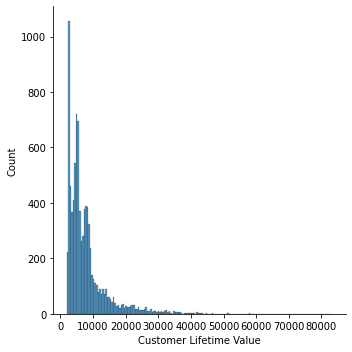

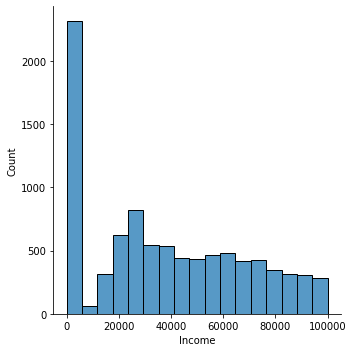

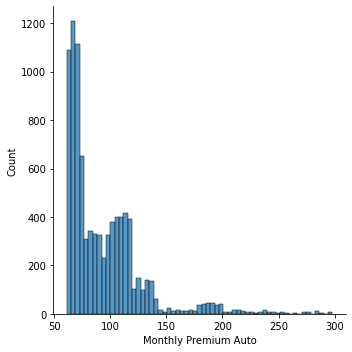

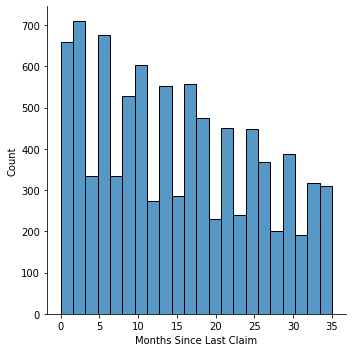

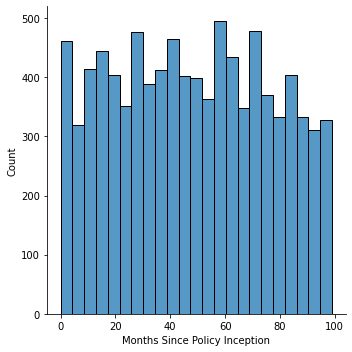

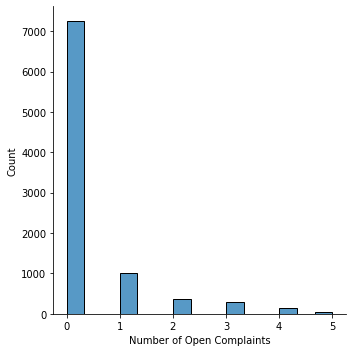

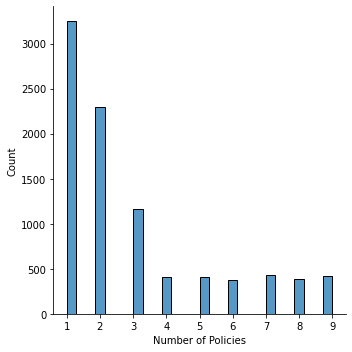

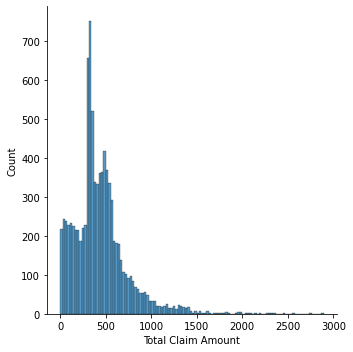

In [5]:
check_distribution(num)

### 3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

#### Boxcox transform:

In [6]:
num_bc = num.copy()

In [7]:
def boxcox_transform(df):
    numeric_cols = df.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        df[column] = np.where(df[column]<=0, np.NAN, df[column]) 
        df[column] = df[column].fillna(df[column].mean())
        transformed_data, ci = stats.boxcox(df[column])
        df[column] = transformed_data
        _ci[column] = [ci] 
    return df, _ci

In [8]:
num_bc, _ci = boxcox_transform(num_bc)

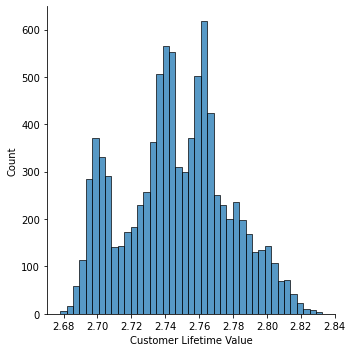

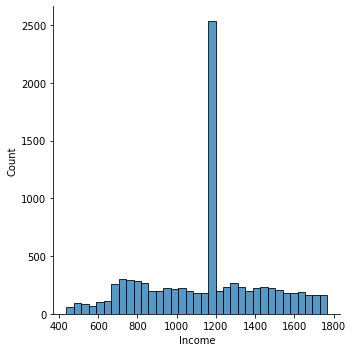

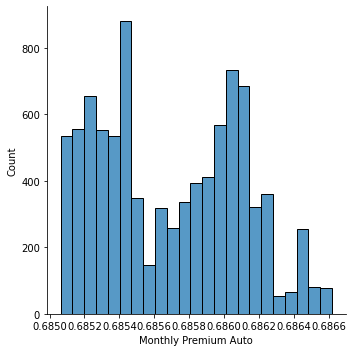

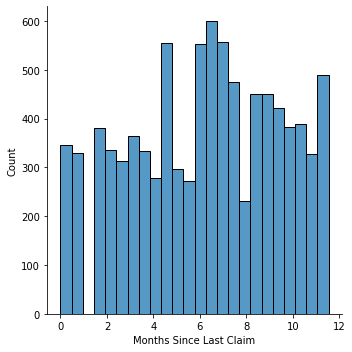

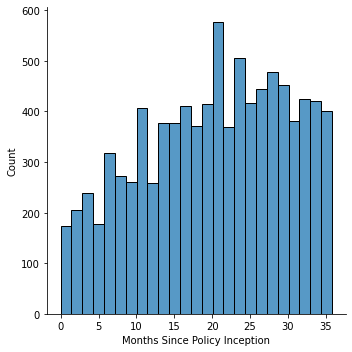

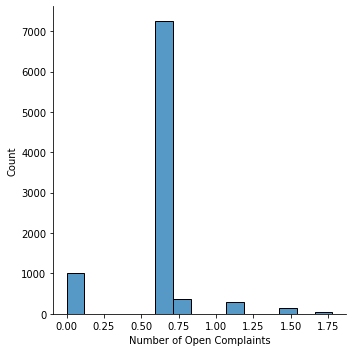

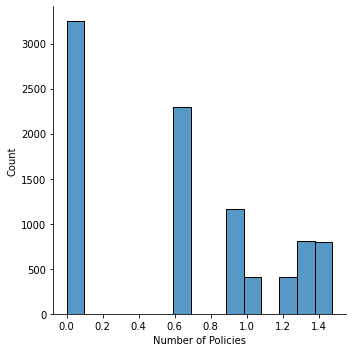

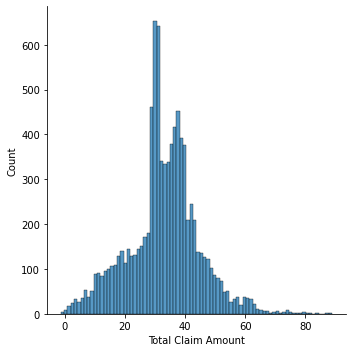

In [9]:
check_distribution(num_bc)

#### Log transformation

In [10]:
num_log = num.copy()

In [11]:
def log_transfom(x):
    x = np.log(x)
    if np.isfinite(x):
        return np.log(x)
    else:
        return np.NAN
def log_transform_df(df):
    for col in df:
        df[col] = df[col].apply(log_transfom)
        df[col] = df[col].fillna(np.mean(df[col]))

In [12]:
log_transform_df(num_log)

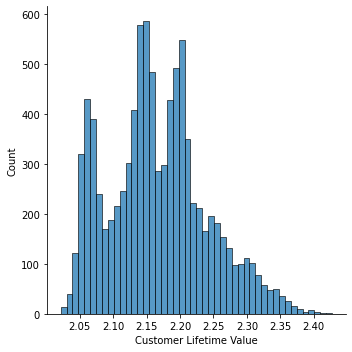

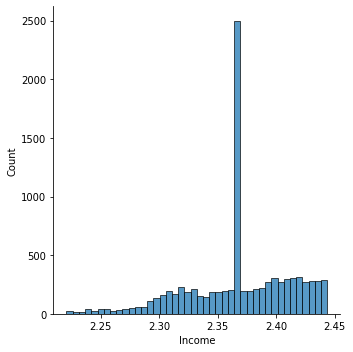

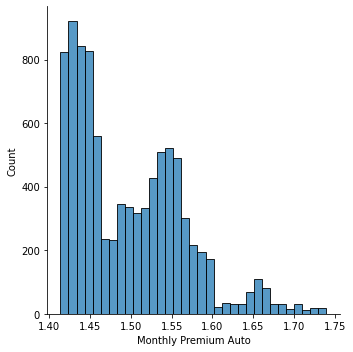

ValueError: autodetected range of [-inf, 1.2684529660545276] is not finite

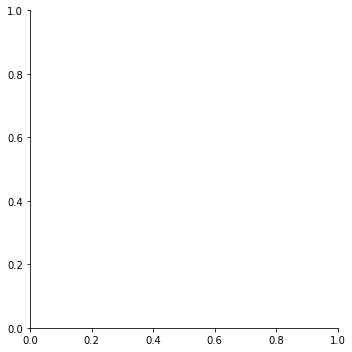

In [13]:
check_distribution(num_log)

#### Normalizer

In [14]:
num_norm = num.copy()

In [15]:
transformer = Normalizer().fit(num_norm)

num_norm = transformer.transform(num_norm)
num_norm = pd.DataFrame(num_norm, columns = ['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
                                   'Months Since Last Claim', 'Months Since Policy Inception',
                                   'Number of Open Complaints', 'Number of Policies',
                                   'Total Claim Amount'])

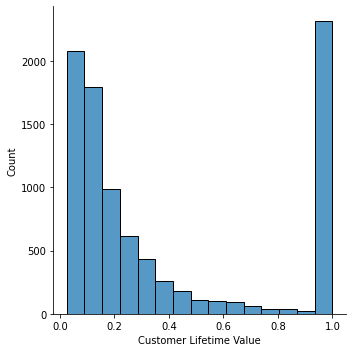

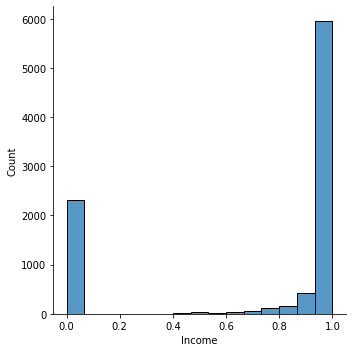

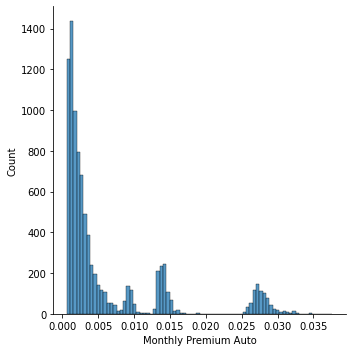

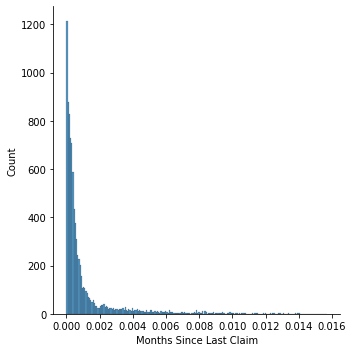

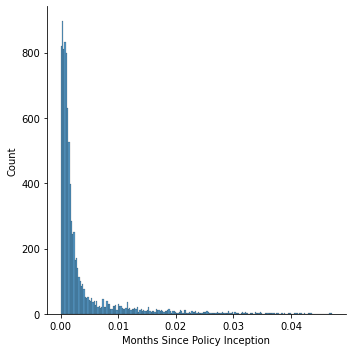

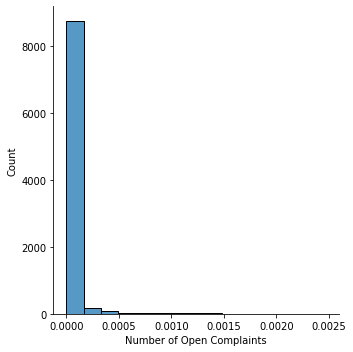

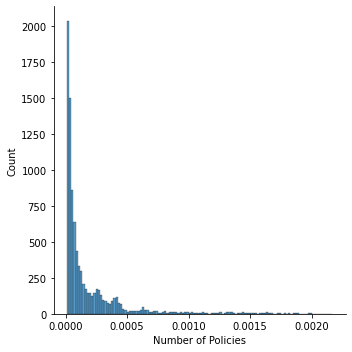

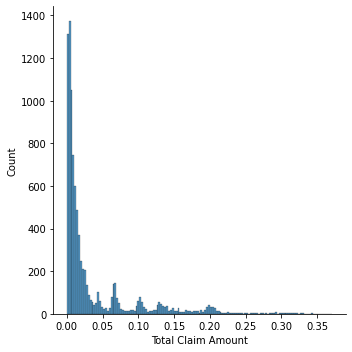

In [16]:
check_distribution(num_norm)

#### Standard Scaler

In [18]:
num_std = num.copy()

In [19]:
transformer = StandardScaler()
# so make sure you do the train-test split first
# (train-test split comes first, or else your trainning set will carry information from your test set)
transformer.fit(num_std)

num_std = transformer.transform(num_std)

In [21]:
num_std= pd.DataFrame(num_std)

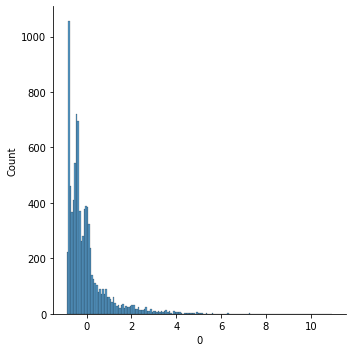

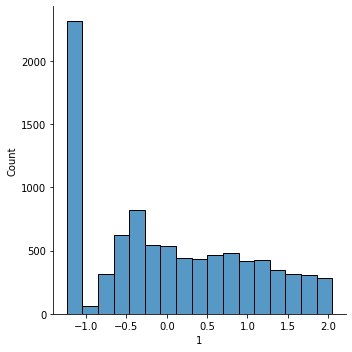

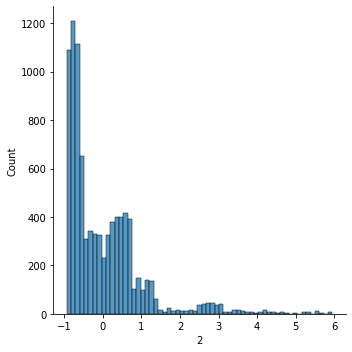

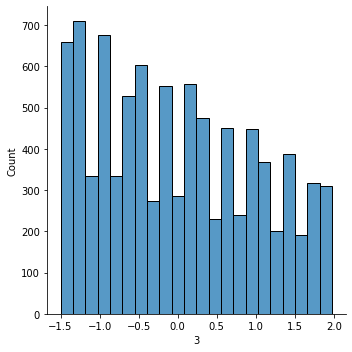

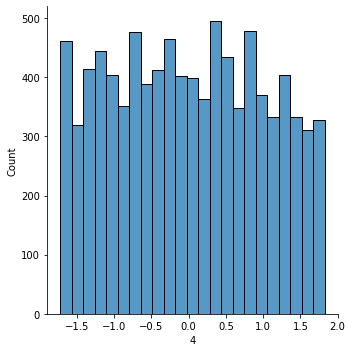

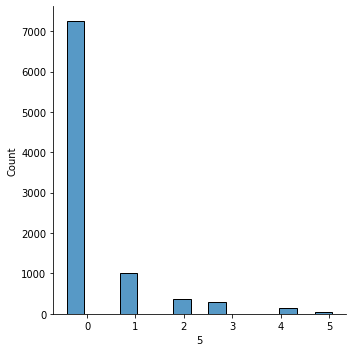

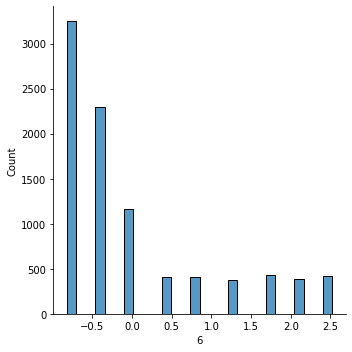

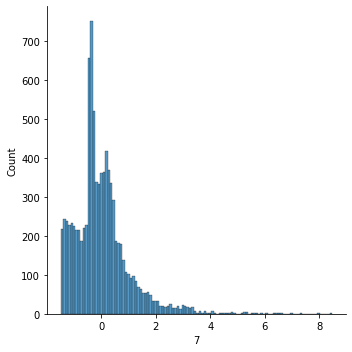

In [23]:
check_distribution(num_std)